In [6]:
from keras.models import Model
from keras.engine.input_layer import Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation, UpSampling2D, Concatenate

In [68]:
def build_model(input_size):
    
    inputs = Input(input_size)
    
    conv1 = Conv2D(filters=64,
                  kernel_size=3,
                  activation='relu',
                  padding='same')(inputs)
    
    conv1 = Conv2D(filters=64,
                  kernel_size=3, 
                  activation='relu',
                  padding='same')(conv1)
    
    pool1 = MaxPooling2D(pool_size=(2,2))(conv1)
    
    conv2 = Conv2D(filters=128,
                  kernel_size=3,
                  activation='relu',
                  padding='same')(pool1)
    
    conv2 = Conv2D(filters=128,
                  kernel_size=3, 
                  activation='relu',
                  padding='same')(conv2)
    
    pool2 = MaxPooling2D(pool_size=(2,2))(conv2)
    
    conv3 = Conv2D(filters=256,
                  kernel_size=3,
                  activation='relu',
                  padding='same')(pool2)
    
    conv3 = Conv2D(filters=256,
                  kernel_size=3, 
                  activation='relu',
                  padding='same')(conv3)
    
    pool3 = MaxPooling2D(pool_size=(2,2))(conv3)
    
    conv4 = Conv2D(filters=512,
                  kernel_size=3,
                  activation='relu',
                  padding='same')(pool3)
    
    conv4 = Conv2D(filters=512,
                  kernel_size=3, 
                  activation='relu',
                  padding='same')(conv4)
    
    drop4 = Dropout(0.5)(conv4)
    
    pool4 = MaxPooling2D(pool_size=(2,2))(drop4)
    
    conv5 = Conv2D(filters=1024,
                  kernel_size=3,
                  activation='relu',
                  padding='same')(pool4)
    
    conv5 = Conv2D(filters=1024,
                  kernel_size=3, 
                  activation='relu',
                  padding='same')(conv5)
    
    drop5 = Dropout(0.5)(conv5)
    
    up6 = UpSampling2D(size=(2,2))(drop5)
    
    up6 = Conv2D(filters=512,
                  kernel_size=2,
                  activation='relu',
                  padding='same')(up6)
    
    merge6 = Concatenate(axis=3)([drop4,up6])
    
    conv6 = Conv2D(filters=512,
                  kernel_size=3,
                  activation='relu',
                  padding='same')(merge6)
    
    conv6 = Conv2D(filters=512,
                  kernel_size=3,
                  activation='relu',
                  padding='same')(conv6)
    
    up7 = UpSampling2D(size=(2,2))(conv6)
    
    up7 = Conv2D(filters=256,
                  kernel_size=2,
                  activation='relu',
                  padding='same')(up7)
    
    merge7 = Concatenate(axis=3)([conv3,up7])
    
    conv7 = Conv2D(filters=256,
                  kernel_size=3,
                  activation='relu',
                  padding='same')(merge7)
    
    conv7 = Conv2D(filters=256,
                  kernel_size=3,
                  activation='relu',
                  padding='same')(conv7)
    
    up8 = UpSampling2D(size=(2,2))(conv7)
    
    up8 = Conv2D(filters=128,
                  kernel_size=2,
                  activation='relu',
                  padding='same')(up8)
    
    merge8 = Concatenate(axis=3)([conv2,up8])
    
    conv8 = Conv2D(filters=128,
                  kernel_size=3,
                  activation='relu',
                  padding='same')(merge8)
    
    conv8 = Conv2D(filters=128,
                  kernel_size=3,
                  activation='relu',
                  padding='same')(conv8)
    
    up9 = UpSampling2D(size=(2,2))(conv8)
    
    up9 = Conv2D(filters=64,
                  kernel_size=2,
                  activation='relu',
                  padding='same')(up9)
    
    merge9 = Concatenate(axis=3)([conv1,up9])
    
    conv9 = Conv2D(filters=64,
                  kernel_size=3,
                  activation='relu',
                  padding='same')(merge9)
    
    conv9 = Conv2D(filters=64,
                  kernel_size=3,
                  activation='relu',
                  padding='same')(conv9)
    
    conv9 = Conv2D(filters=2,
                  kernel_size=3,
                  activation='relu',
                  padding='same')(conv9)
    
    conv10 = Conv2D(filters=2,
                  kernel_size=3,
                  activation='sigmoid',
                  padding='same')(conv9)
    
    model = Model(inputs=inputs,outputs=conv10)
    
    return model

In [27]:
import pykitti

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist

In [42]:
x=plt.imread("data_road\\training\\image_2\\um_000000.png")
type(x)

numpy.ndarray

In [45]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [47]:
print(type(x_train),x_train.shape)

<class 'numpy.ndarray'> (60000, 28, 28)


In [48]:
x.shape

(375, 1242, 3)

In [64]:
x_train=[]
for i in range(0,10):
    x=plt.imread("data_road\\training\\image_2\\um_00000"+str(i)+".png")
    x_train.append(x)
'''for i in range(10,95):
    x=plt.imread("data_road\\training\\image_2\\um_0000"+str(i)+".png")
    arr.append(x)'''
x_train=np.array(x_train)
x_train.shape

(10, 375, 1242, 3)

In [66]:
y_train=[]
for i in range(0,10):
    x=plt.imread("data_road\\training\\gt_image_2\\um_lane_00000"+str(i)+".png")
    y_train.append(x)
y_train=np.array(y_train)
y_train.shape

(10, 375, 1242, 3)

In [ ]:
x_test=[]
for i in range(0,10):
    x=plt.imread("data_road\\training\\gt_image_2\\um_lane_00000"+str(i)+".png")
    x_test.append(x)
x_test=np.array(y_train)
x_test.shape

In [69]:
model=build_model((375,1242,3))

ValueError: A `Concatenate` layer requires inputs with matching shapes except for the concat axis. Got inputs shapes: [(None, 46, 155, 512), (None, 46, 154, 512)]

(375, 1242)

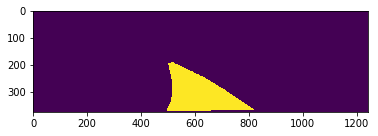

In [116]:
x=x_train[0][:,:,2]
plt.imshow(x)
x.shape
x=y_train[0][:,:,2]
plt.imshow(x)

In [125]:
x=x_train[:,:,:,1]
x=x.reshape(10,375,1242,1)
x.shape

y=y_train[:,:,:,1]
y=y.reshape(10,375,1242,1)
y.shape

(10, 375, 1242, 1)

In [88]:
def get_model():
    inputs = Input((375, 1242, 3))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = Concatenate(axis=3)([UpSampling2D(size=(2, 2))(conv5), conv4])
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = Concatenate([UpSampling2D(size=(2, 2))(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = Concatenate([UpSampling2D(size=(2, 2))(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = Concatenate([UpSampling2D(size=(2, 2))(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    model = Model(inputs=[inputs], outputs=[conv10])
    
    return model

In [128]:
from keras.layers import Cropping2D, concatenate,ZeroPadding2D
import keras

In [129]:
def get_crop_shape(target, refer):
        # width, the 3rd dimension
        cw = (target.get_shape()[2] - refer.get_shape()[2]).value
        assert (cw >= 0)
        if cw % 2 != 0:
            cw1, cw2 = int(cw/2), int(cw/2) + 1
        else:
            cw1, cw2 = int(cw/2), int(cw/2)
        # height, the 2nd dimension
        ch = (target.get_shape()[1] - refer.get_shape()[1]).value
        assert (ch >= 0)
        if ch % 2 != 0:
            ch1, ch2 = int(ch/2), int(ch/2) + 1
        else:
            ch1, ch2 = int(ch/2), int(ch/2)

        return (ch1, ch2), (cw1, cw2)

In [130]:
def create_model(img_shape, num_class):

        concat_axis = 3
        inputs = Input(img_shape)

        conv1 = Conv2D(32, (3, 3), activation='relu', padding='same', name='conv1_1')(inputs)
        conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
        pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
        
        conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
        conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
        pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

        conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
        conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
        pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

        conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
        conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
        pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

        conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
        conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

        up_conv5 = UpSampling2D(size=(2, 2))(conv5)
        ch, cw = get_crop_shape(conv4, up_conv5)
        crop_conv4 = Cropping2D(cropping=(ch,cw))(conv4)
        up6 = concatenate([up_conv5, crop_conv4], axis=concat_axis)
        conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
        conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

        up_conv6 = UpSampling2D(size=(2, 2))(conv6)
        ch, cw = get_crop_shape(conv3, up_conv6)
        crop_conv3 = Cropping2D(cropping=(ch,cw))(conv3)
        up7 = concatenate([up_conv6, crop_conv3], axis=concat_axis) 
        conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
        conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

        up_conv7 = UpSampling2D(size=(2, 2))(conv7)
        ch, cw = get_crop_shape(conv2, up_conv7)
        crop_conv2 = Cropping2D(cropping=(ch,cw))(conv2)
        up8 = concatenate([up_conv7, crop_conv2], axis=concat_axis)
        conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
        conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

        up_conv8 = UpSampling2D(size=(2, 2))(conv8)
        ch, cw = get_crop_shape(conv1, up_conv8)
        crop_conv1 = Cropping2D(cropping=(ch,cw))(conv1)
        up9 = concatenate([up_conv8, crop_conv1], axis=concat_axis)
        conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
        conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

        ch, cw = get_crop_shape(inputs, conv9)
        conv9 = ZeroPadding2D(padding=((ch[0], ch[1]), (cw[0], cw[1])))(conv9)
        conv10 = Conv2D(num_class, (1, 1))(conv9)

        model = Model(inputs=inputs, outputs=conv10)

        return model


In [131]:
model=create_model((375,1242,3),1)

In [132]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])

In [135]:
model.fit(x_train,y_train,
         batch_size=32,
         epochs=2,
         verbose=1)

ValueError: Error when checking target: expected conv2d_150 to have shape (375, 1242, 1) but got array with shape (375, 1242, 3)